# Comparison of multiple registrations

''' Created on Wed 20 May 2020'''


In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
import scipy
cmap = cm.jet

In [92]:
mouse = 32364             ### mouse number id
decoding_v = 1            ## decoding version, normaly equal to one
motion_correction_v = 100 ### 100 means everything was aligned, 200 means it was also equalized
alignment_v = 1           ## alignment version
equalization_v = 0        ## equalization version
source_extraction_v = 1   ## source extraction version
component_evaluation_v = 1 ## component evaluation version
registration_v = 1        ## registration version
sf = 10                   ## sampling frequency of the original signal 
re_sf= 20                 ## value of resampling

In [93]:
file_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/calcium_activity_normed/'
timeline_file_dir = os.environ['PROJECT_DIR'] + 'neural_analysis/data/timeline/'
behaviour_dir = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/scoring_time_vector/'
objects_dir= os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/object_positions/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/data/process/figures/traces/'

(262, 130631)
(259, 131992)


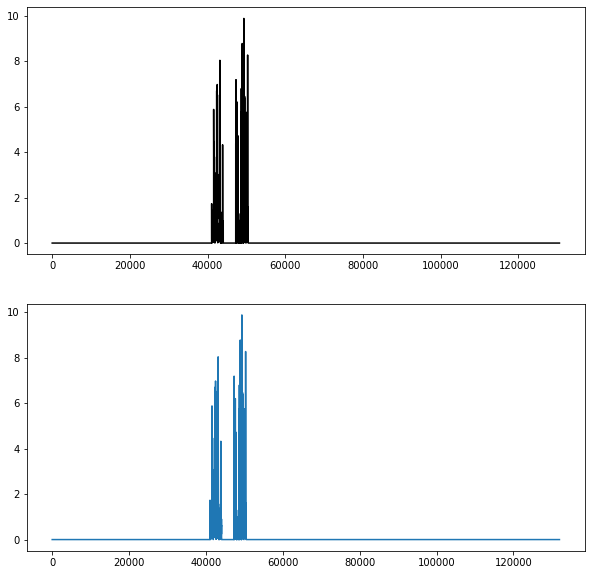

In [100]:
session = 1

time_file_session_1 =  'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{decoding_v}'+'.4.'+f'{1}'+\
                          '.'+f'{0}'+ '.pkl'
beh_file_name_1 = 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'_event_'+f'{re_sf}'+'.npy'

registration_v = 1
file_name_session_1 = 'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{decoding_v}'+'.4.'+f'{100}'+\
                           '.'+f'{alignment_v}'+'.'+ f'{equalization_v}' +'.' + f'{source_extraction_v}'+'.' + \
                              f'{component_evaluation_v}' +'.'+ f'{registration_v}' + '.npy'
activity_original = np.load(file_directory + file_name_session_1)
print(activity_original.shape)

figure, axes = plt.subplots(2,1)
axes[0].plot(activity_original[24,:],color = 'k')

registration_v = 2
file_name_session_1 = 'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{decoding_v}'+'.4.'+f'{100}'+\
                           '.'+f'{alignment_v}'+'.'+ f'{equalization_v}' +'.' + f'{source_extraction_v}'+'.' + \
                              f'{component_evaluation_v}' +'.'+ f'{registration_v}' + '.npy'
activity_shuffle = np.load(file_directory + file_name_session_1)
print(activity_shuffle.shape)

axes[1].plot(activity_shuffle[5,:])
figure.set_size_inches([10., 10])


In [77]:
for registration_v in [1,2,3,4]:
    file_name_session_1 = 'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{decoding_v}'+'.4.'+f'{100}'+\
                           '.'+f'{alignment_v}'+'.'+ f'{equalization_v}' +'.' + f'{source_extraction_v}'+'.' + \
                              f'{component_evaluation_v}' +'.'+ f'{registration_v}' + '.npy'
    activity = np.load(file_directory + file_name_session_1)
    print(activity.shape)
    figure, axes = plt.subplots(1)
    C_0 = activity[1:,:].copy()
    C_0[0] += C_0[0].min()
    for i in range(1, len(C_0)):
        C_0[i] += C_0[i].min() + C_0[:i].max()
        axes.plot(C_0[i])
    axes.set_xlabel('t [frames]')
    axes.set_yticks([])
    #axes.vlines(timeline,0, 150000, color = 'k')
    axes.set_ylabel('activity')
    figure.set_size_inches([50., .5 * len(C_0)])
    figure_name = 'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{decoding_v}'+'.4.'+f'{100}'+\
                           '.'+f'{alignment_v}'+'.'+ f'{equalization_v}' +'.' + f'{source_extraction_v}'+'.' + \
                              f'{component_evaluation_v}' +'.'+ f'{registration_v}' + '.png'
    figure.savefig(figure_path + figure_name)

